<a href="https://colab.research.google.com/github/i8dacake/Mat-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When modeling the rate of change in science systems, function derivatives are commonly used. The function may be unknown or implicitly represented by a set of data points. In this case, it is preferable to compute these derivative numerically.

# **20.1 Numerical Differentiation Problem Statement**

**Numerical grid**: An evenly spaced set of points over the domain of a function, over some interval.

**Spacing or Step size**: The distance between the adjacent points on the grid.

For example, Python can create one dimesion-numerical grids such as linspace to create regularly spaced arrays.
Following is an example of a numerical grid: 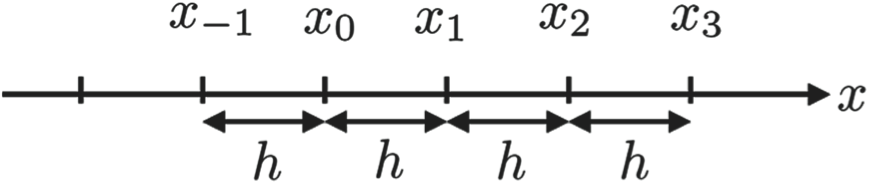


The function value is may only be known at discrete points. Even if the data is continuous, the representation is discretized which is useful for calculations.

# **20.2 Finite Difference Approximating Derivatives**

**Derivative**: The derivative (𝑓′(𝑥) of a function 𝑓(𝑥) at the point 𝑥 = 𝑎 is defined as $f'(a) = \lim\limits_{x \to a}\frac{f(x) - f(a)}{x-a}$. The derivative is the slope at this point.

**Forward difference**: The forward difference is to estimate the slope of the function at 𝑥𝑗 using the line that connects (𝑥𝑗,𝑓(𝑥𝑗)) and (𝑥𝑗+1,𝑓(𝑥𝑗+1)) $f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j}$.

**Backward difference**: The backward difference is to estimate the slope of the function at 𝑥𝑗 using the line that connects (𝑥𝑗−1,𝑓(𝑥𝑗−1)) and (𝑥𝑗,𝑓(𝑥𝑗)) $f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}$.

**Central difference**: The central difference is to estimate the slope of the function at 𝑥𝑗 using the line that connects (𝑥𝑗−1,𝑓(𝑥𝑗−1)) and (𝑥𝑗+1,𝑓(𝑥𝑗+1)) $f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}$.

**O(h)**: 𝑂(ℎ) describes the accuracy of the forward difference formula for approximating derivatives. $f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h}$

For an approximation that is 𝑂(ℎ$^𝑝$), we say that 𝑝 is the order of the accuracy of the approximation.

***Consider the function 𝑓(𝑥)=cos(𝑥). Computes the derivatives numerically.***

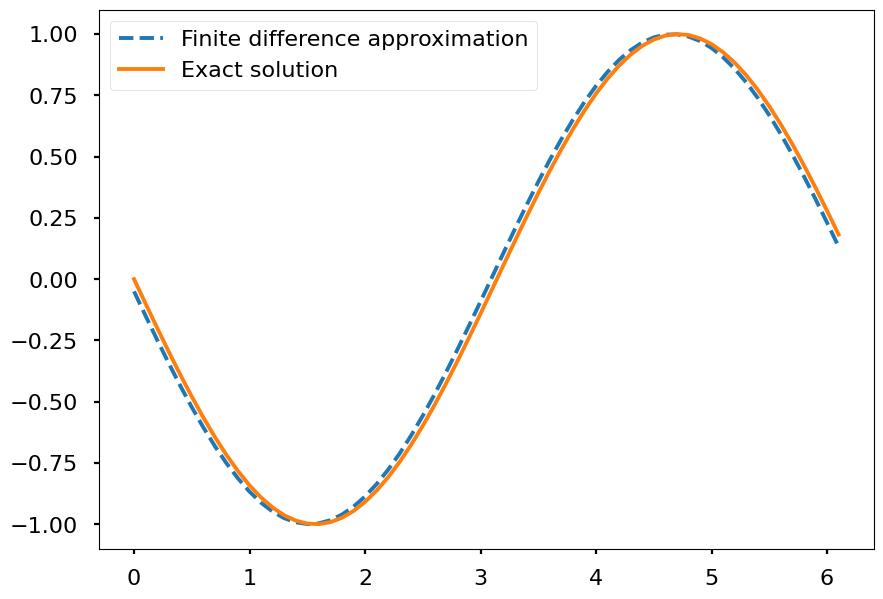

0.049984407218554114


In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This is the step size.
h = 0.1
# Defining the grid.
x = np.arange(0, 2*np.pi, h)
# Computing the function.
y = np.cos(x)

# Computing the vector of forward differences.
forward_diff = np.diff(y)/h
# Computing the corresponding grid.
x_diff = x[:-1:]
# Computing the exact solution.
exact_solution = -np.sin(x_diff)

# Plotting the solution.
plt.figure(figsize = (10, 7))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Computing the max error between the numerical derivative and the exact solution.
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

In the above figure, the numerical error in the evaluation of the numerical derivatives causes a small offset between the two curves. This difference decreases with the size of the discretization step.


# **20.3 Approximating of Higher Order Derivatives**

It is possible to compute higher order derivaties. This can also be achieved by using the Taylor series. For example, taking the Taylor series around 𝑎=𝑥𝑗 and then computing it at 𝑥=𝑥𝑗−1 and 𝑥𝑗+1 gives $f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}$.

# **20.4 Numerical Differentiation with Noise**

It is possible that data can be contaminated with noise. This means that its value will be off by a small degree from what it would be if it were computed from the point of view of a pure mathematical function. This can occur due to inaccuracies in measurement devices or other unseen variables.

***Numerically compute the derivative of a simple cosine wave corrupted by a small sin wave.***

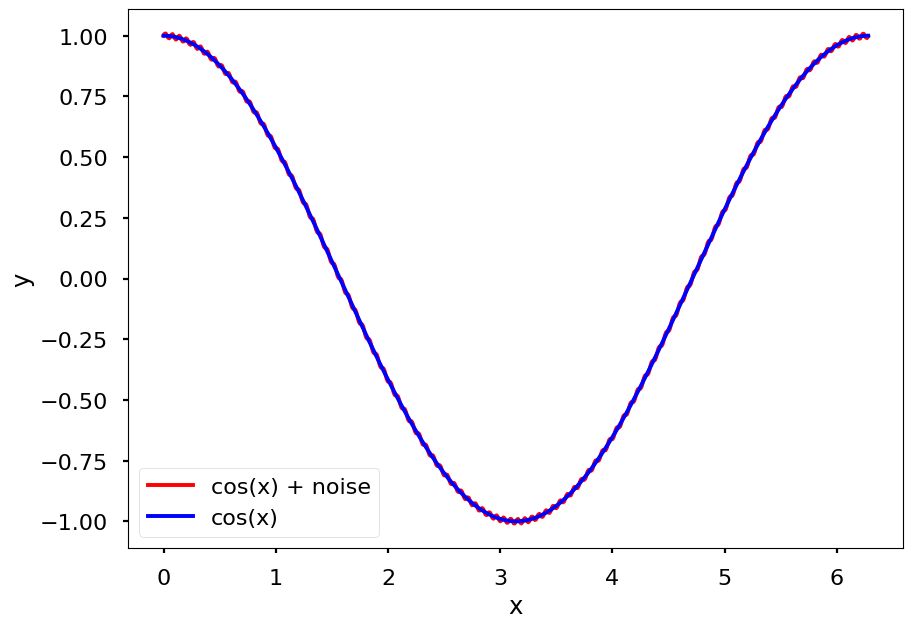

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)
# Computing the function.
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plotting the solution.
plt.figure(figsize = (10, 7))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()